In [162]:
!pip install datasist

In [163]:
import numpy as np
import pandas as pd
import seaborn as sns
import datasist as ds
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

In [164]:
df_train = pd.read_csv('train.csv')


In [165]:
# A picture is worth a thousand words, During the titanic sink , the third class seems to be the part that had sinked 
#the most ... followed by people in the third and second class.
#from the accident we can notice that the first half of the ship floated for sometime before sinking
#that means that we might have some first class & second class people to live while 
#the people in third class have low percentage to live because they were at a deep level in the water 
#unless they know how to swim 
#In this following lines , we will try to learn from the data more about what happened in the accident 
#and classify if a member has lived or not 


<img src="https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w"/>

# Exploring Data

In [166]:
df_train.head(2)
#From the Kaggle Data , here is the summary 
#Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#survived :Survival (0 = No; 1 = Yes)
#name: Name (can be of diffrent Rank Mr/Mrs/Miss/Sir...etc)
#sex :Sex (male,female)
#age :Age (#number of months)
#sibsp :Number of Siblings/Spouses Aboard
#parch: Number of Parents/Children Aboard
#ticket: Ticket Number
#fare: Passenger Fare (British pound)
#cabin :Cabin
#embarked :Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [167]:
df_train.describe() #NO incorrect data found for the numerical data...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [168]:
df_train.info() 
#Sex is a String 
#Embarked is a String 
#null values at Age & Cabin, embarked ....


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
#Another way to get the missing values 
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [170]:
#getting inconissitent values (if any) ... did not find any
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [171]:
#Another way to make sure there isn't inconssitant data 
for col in df_train.columns:
    print(f'The column:{col}\nvalues_count:\n{df_train[col].value_counts()}\n\n')

The column:PassengerId
values_count:
891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64


The column:Survived
values_count:
0    549
1    342
Name: Survived, dtype: int64


The column:Pclass
values_count:
3    491
1    216
2    184
Name: Pclass, dtype: int64


The column:Name
values_count:
Waelens, Mr. Achille                          1
Molson, Mr. Harry Markland                    1
Porter, Mr. Walter Chamberlain                1
Crosby, Miss. Harriet R                       1
Sedgwick, Mr. Charles Frederick Waddington    1
                                             ..
Johnston, Mr. Andrew G                        1
Kraeff, Mr. Theodor                           1
Carter, Miss. Lucile Polk                     1
Pickard, Mr. Berk (Berk Trembisky)            1
Andersson, Miss. Ellis Anna Maria             1
Name: Name, Length: 891, dtype: int64


The column:Sex
values_count:
male      577
femal

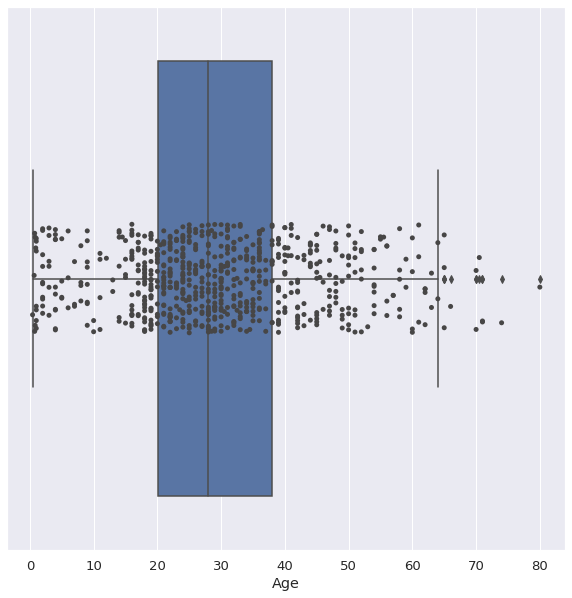

In [172]:
#getting outliers ..here are some outliers 
sns.boxplot(x='Age', data=df_train)
sns.stripplot(x='Age', data=df_train, color="#474646")

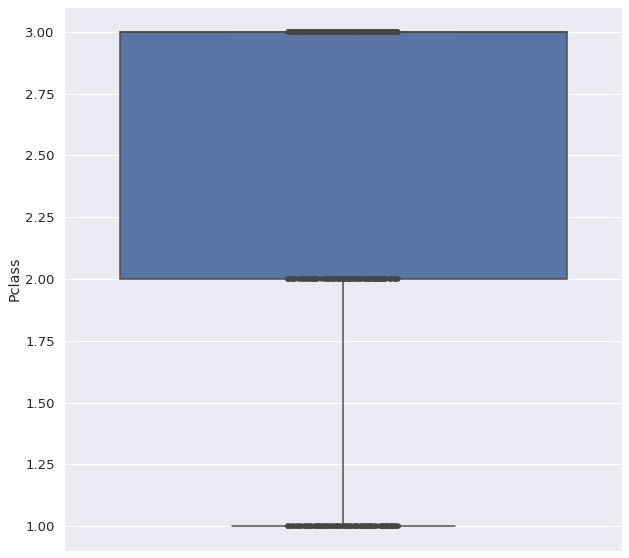

In [173]:
#no outliers here 
sns.boxplot(y='Pclass', data=df_train)
sns.stripplot(y='Pclass', data=df_train, color="#474646")

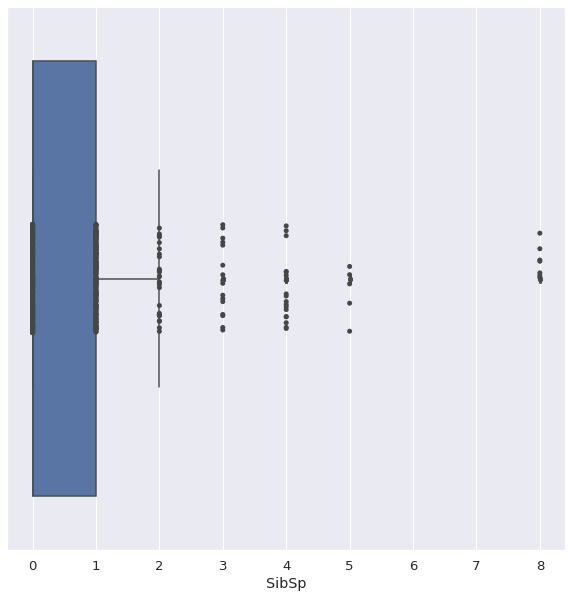

In [174]:
#getting outliers ..here are some natural outliers (we may not need to do processing to those)
sns.boxplot(x='SibSp', data=df_train)
sns.stripplot(x='SibSp', data=df_train, color="#474646")

In [175]:
#Getting the correlation
mycols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
my_df = df_train[mycols] #Fancy indexing.... I am doing that to get the correlation Only for those

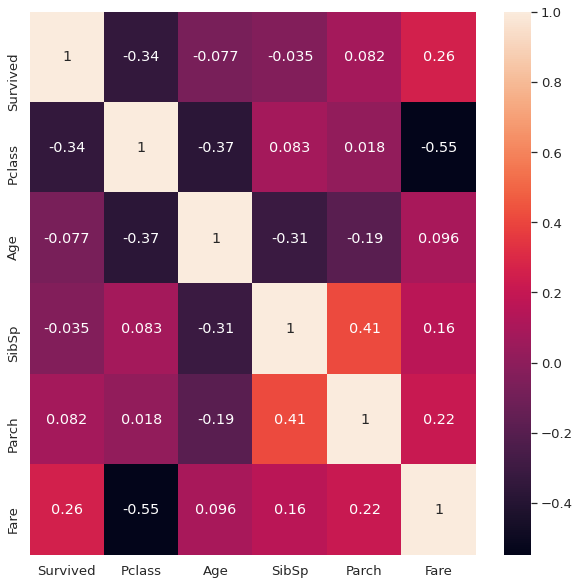

In [176]:
sns.heatmap(my_df.corr(),annot=True)
#Pclass & Fare : Have good Correlations
#Pclass & Survived : Maybe people who were high class was in a better place in the ship
#Pclass & Age : Have good Correlations
#Parch & Siblings Are not important...

# Some visualizations

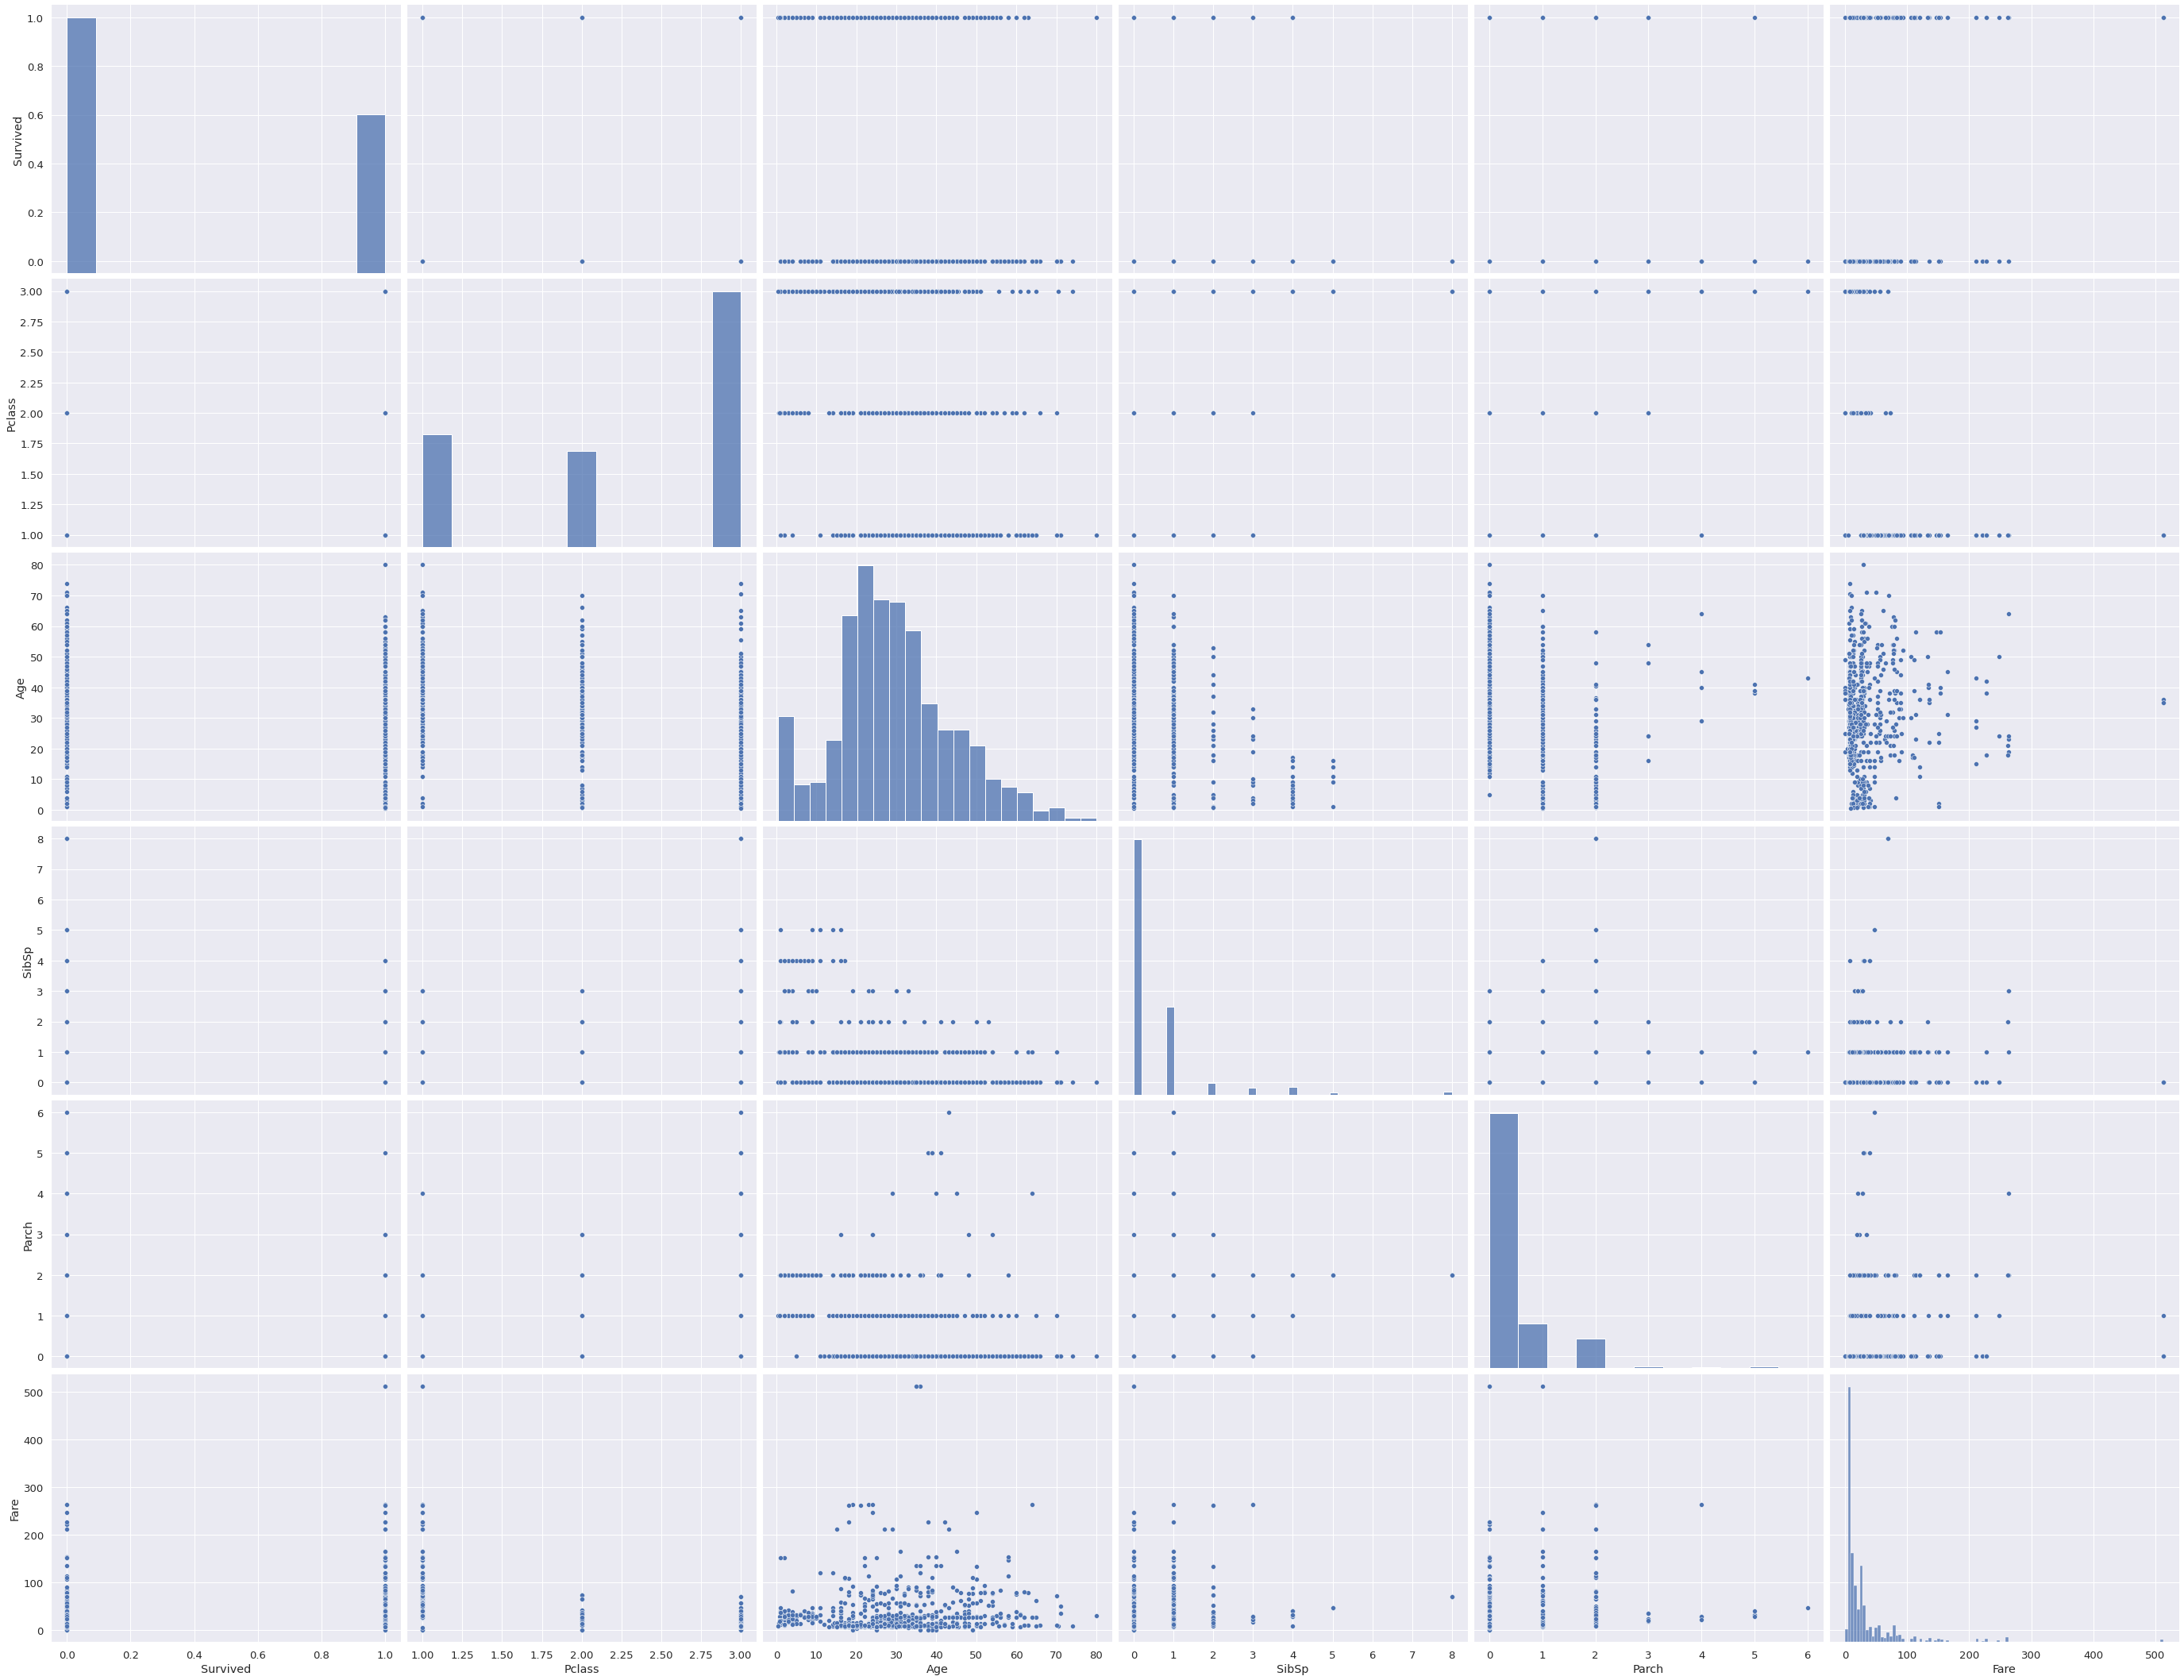

In [177]:
#paiplot 
#Getting the correlation
mycols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
my_df = df_train[mycols] #Fancy indexing.... I am doing that to plot Only for those

sns.pairplot(my_df, height=5, aspect=1.3)

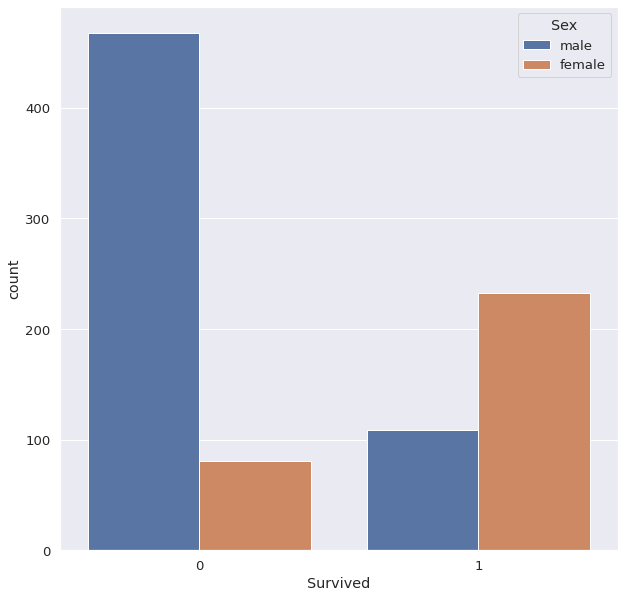

In [178]:
sns.countplot(x='Survived', hue='Sex' ,data=df_train)
#amount of died > amount of survived in the training set 
#number of survived female is more than # of survived men 
 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


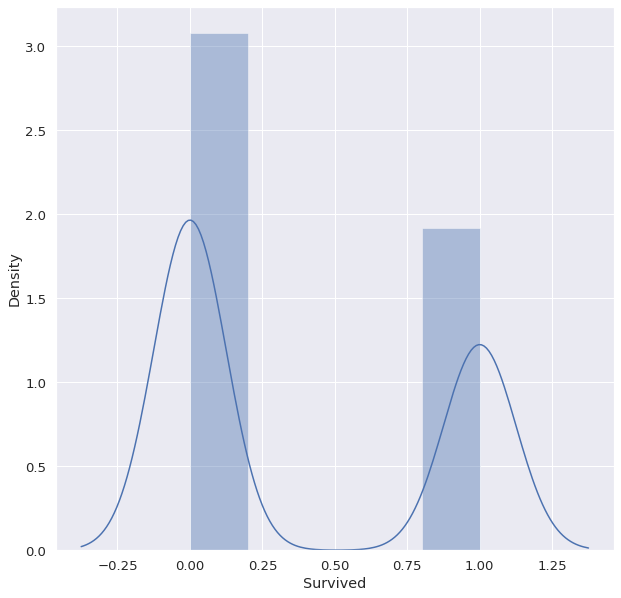

In [179]:
sns.distplot(df_train['Survived'])
#Here as well ... died > survived 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


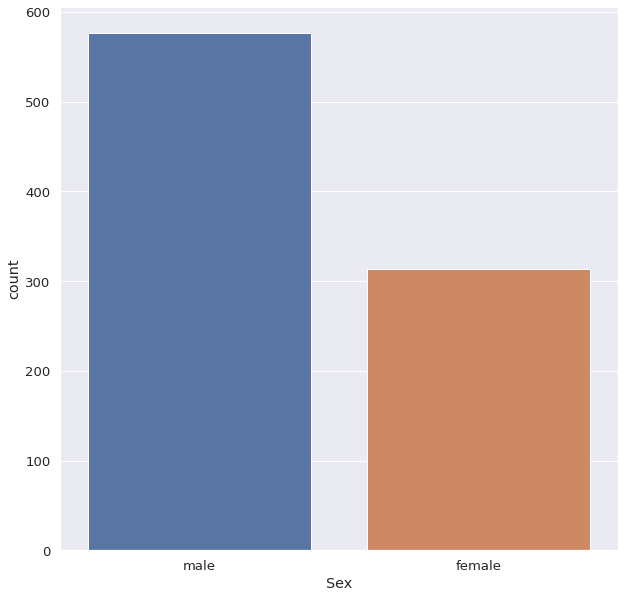

In [180]:
sns.countplot(df_train['Sex'])
#Amount  of male is more than Female 

' as we see , pclass=3 have alot of male , & we saw that many men were died. so we can say there might be a \nrelation between pclass & survived\n'

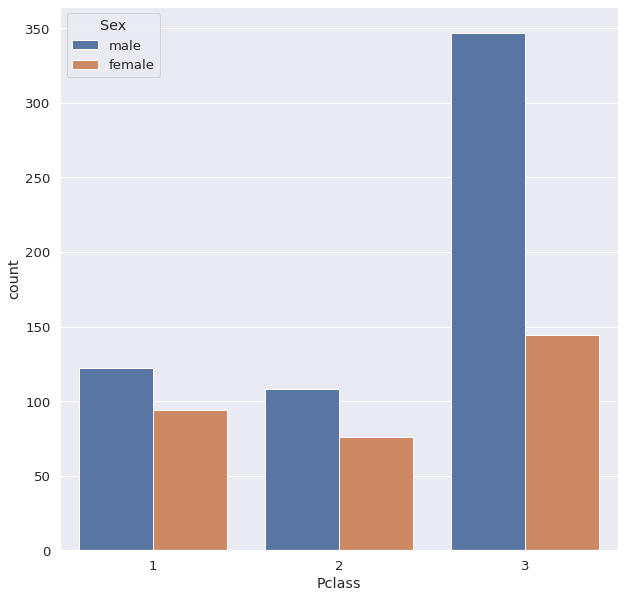

In [181]:
sns.countplot(x='Pclass', hue='Sex' ,data=df_train)
""" as we see , pclass=3 have alot of male , & we saw that many men were died. so we can say there might be a 
relation between pclass & survived
"""

#Astrocratic men Pclass=1 was higher than Astrocratic women

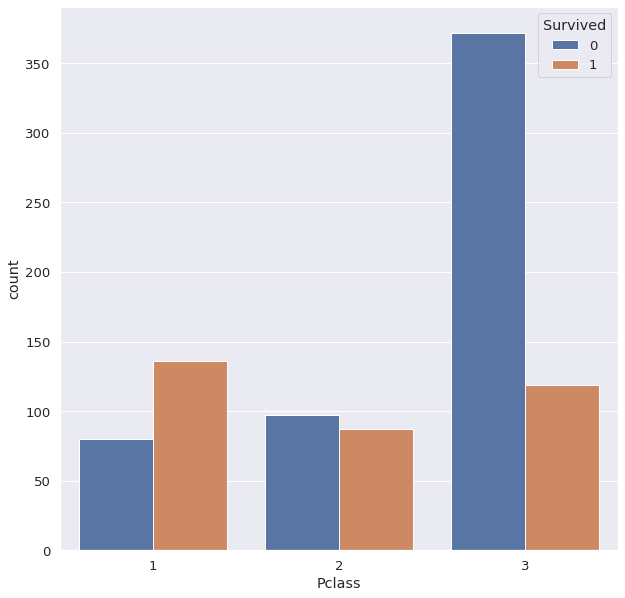

In [182]:
sns.countplot(x='Pclass', hue='Survived' ,data=df_train)
#as we can see pclass=3 , have many died people 
#pclass=2 have higher percentage of survived than died in relation to pclass=1 
#pclass=1 have more survived than died ... maybe people are of high rank?

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


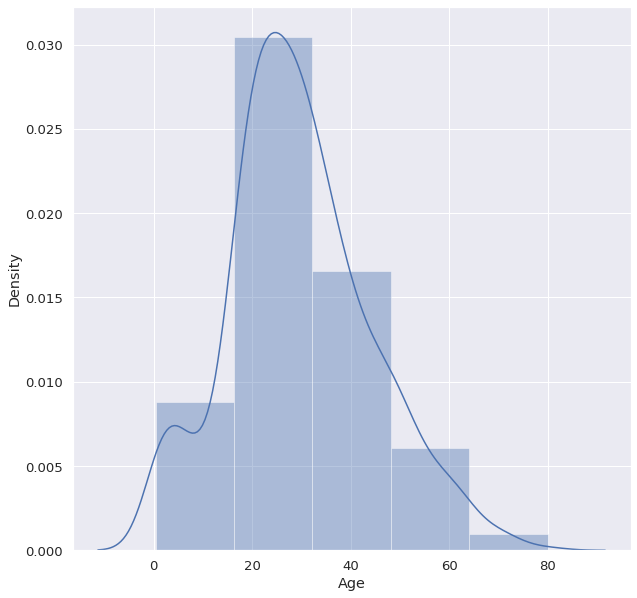

In [183]:
sns.distplot(df_train['Age'] ,bins=5,norm_hist=True)
#People 20-30 were the most in the training set 

In [184]:
#some temproary feature engineering 
#replace Name by Rank & count them 
#all_data.drop('Name',axis=1,inplace=True)
def extract_title(name):
    title= name.split(',')[1].split('.')[0]
    
    if (title.strip() == "Mr") :
        return 0 
    if (title.strip() == "Mrs") : 
        return 1 
    if (title.strip() == "Miss") :
        return 2
    else :
        return 3 #none of the above  
    
df_train['Rank'] =  df_train['Name'].apply(extract_title)


In [185]:
df_train['Rank'] = pd.to_numeric(df_train['Rank'])

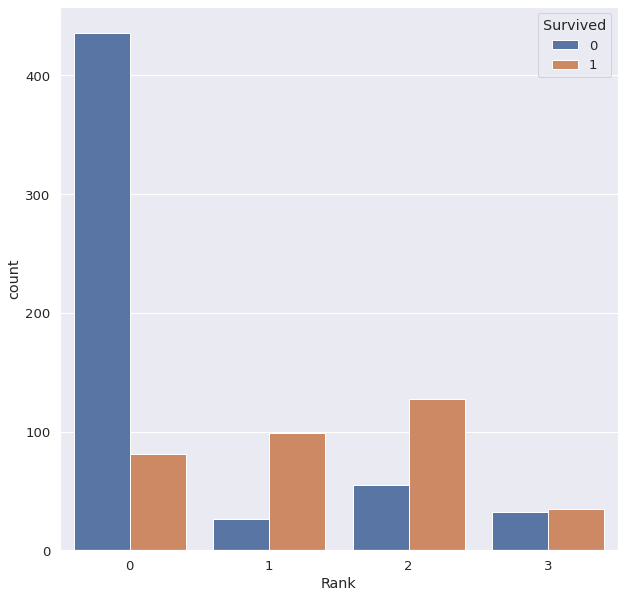

In [186]:
sns.countplot(x='Rank',hue='Survived' ,data=df_train)
#Using the Names. we can see that most of the dead people are from Mr Rank (Normal guys)
#Having a specfic title can impact with correlation 


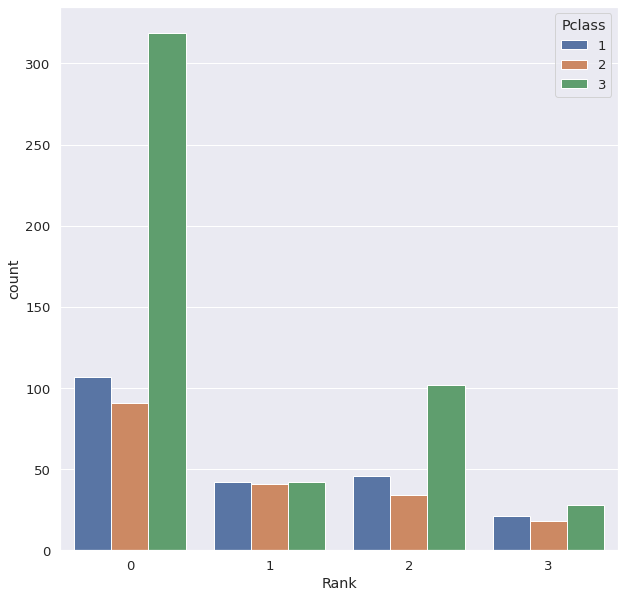

In [187]:
sns.countplot(x='Rank',hue='Pclass' ,data=df_train)
#Pclass=1 have the most amount of people , some of (Rank=Mr) was in the first class which is weird 
#as expected the other rank were the fewest 
#Poor women was less than poor men which is expected as well

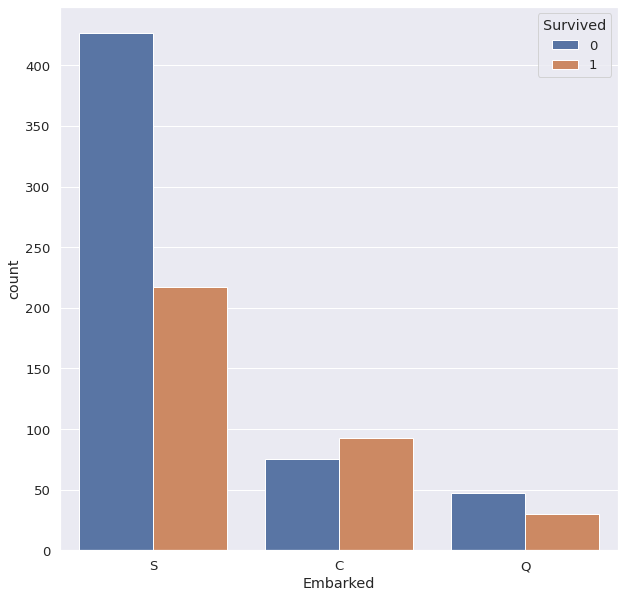

In [188]:
sns.countplot(x='Embarked', hue='Survived' ,data=df_train)
#people embarked from S was the highest to survive.
#however this does not make any relations because embarking is just the position of where they ride from

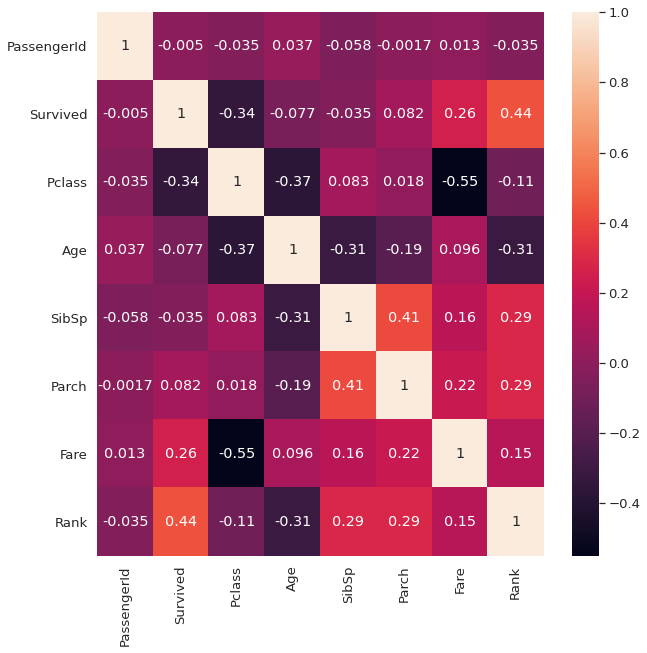

In [189]:
sns.heatmap(df_train.corr(),annot=True)
#Survived with Name now has a correlation with survived 
#pclass with fare

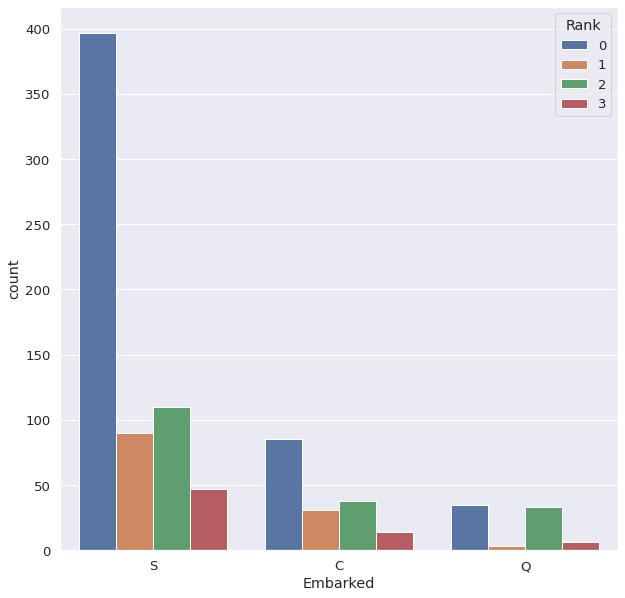

In [190]:
sns.countplot(x='Embarked', hue='Rank' ,data=df_train)
#Most normal people (Mr rank) where embarked from S 
#Most rich people embarked from S 
#we can see as well that the wealthy people is of small percentage 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


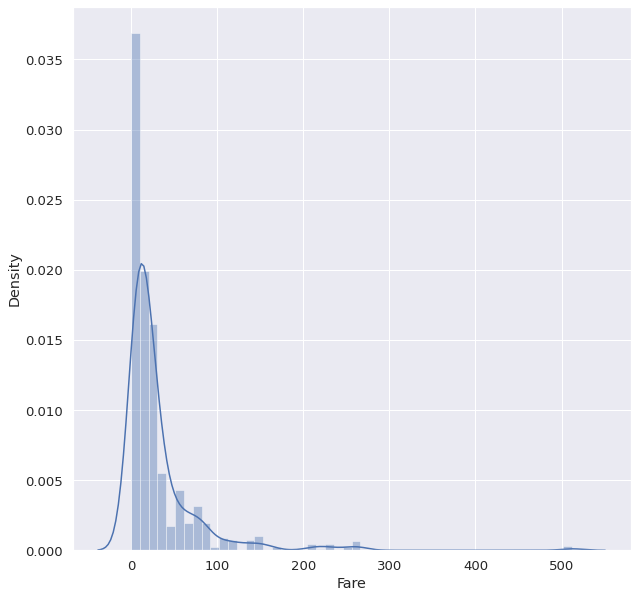

In [191]:
sns.distplot(df_train['Fare'] ,bins=50)
#Very high percentage of people almost didnot pay anything 
#Also one observation that we can use later on (we can do binning for that 0-50 50-100)

In [192]:
mycols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']
my_df = df_train[mycols] 

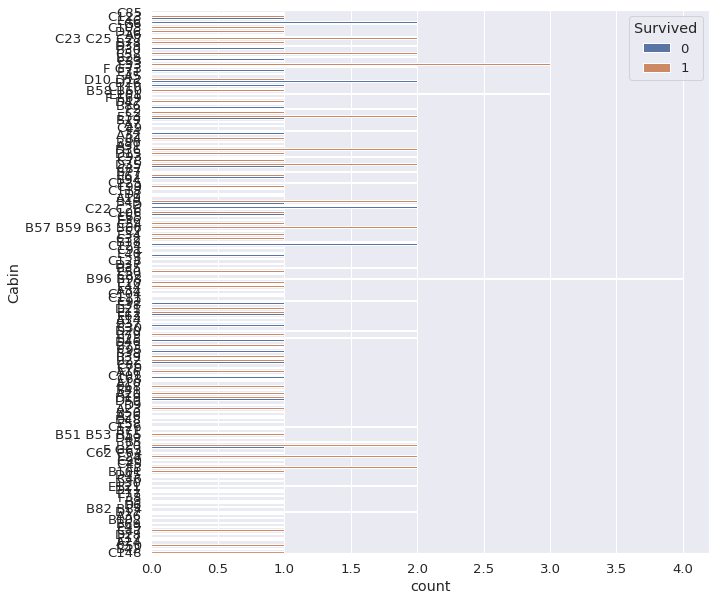

In [193]:
sns.countplot(y='Cabin',dodge=True,hue="Survived" ,data=my_df)
#Not visible , will try to group them by first letter 

In [194]:
#Let's group by first letter 
def groupCabins(cabin):
    if(pd.notnull(cabin)):
        return cabin[0]
    else:
        return "U" #for Unknown 

df_train['CabinGroup'] = df_train['Cabin'].apply(groupCabins)
    

In [195]:
#Converting to a string so that later on we can do the [0] indexing 
#df_train['CabinGroup'] = df_train['Cabin']+" "

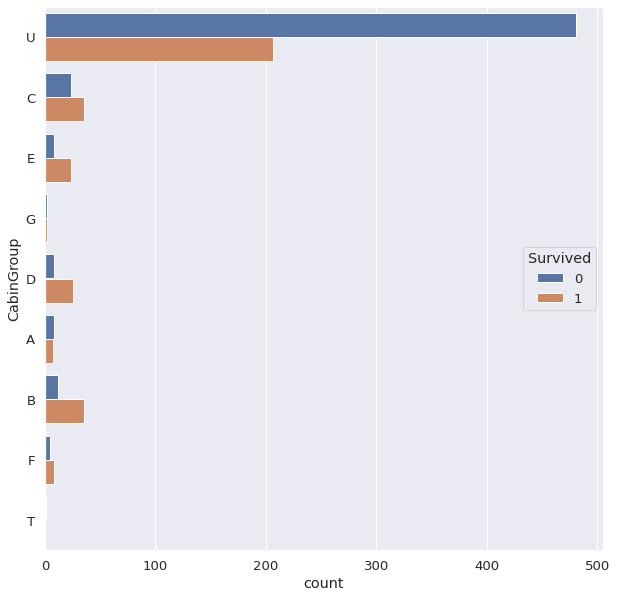

In [196]:
sns.countplot(y='CabinGroup',dodge=True,hue="Survived" ,data=df_train)
#Most Survived were from C,B,E,D maybe that means those specfic place in the ship was maybe on top
#Many people were not identified to be from which cabin 
#B&C as the letter sequence suggest might be near each other
#But we should note that those are not all values as there are some null values 

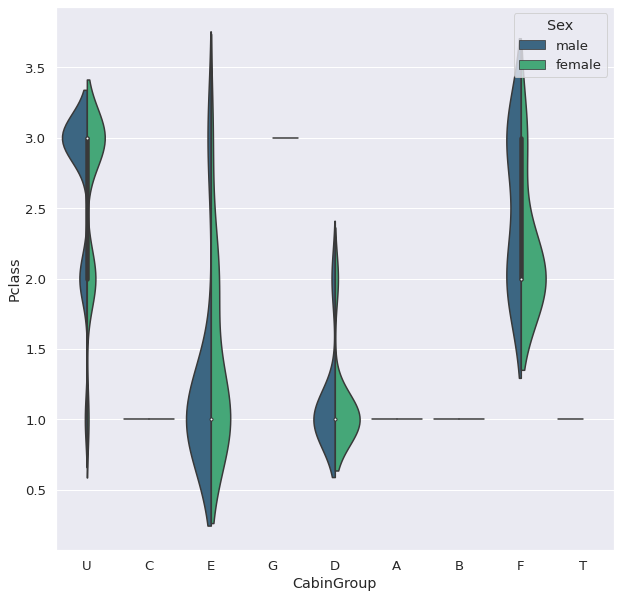

In [197]:
sns.violinplot(y="Pclass", x="CabinGroup", data=df_train, hue='Sex', split=True, palette='viridis')
#pclass=1 was mostly from E,D cabins 
#PCLASS=2 was mostly from cabin F 
#Pclass=3 was mostly of unknown cabin

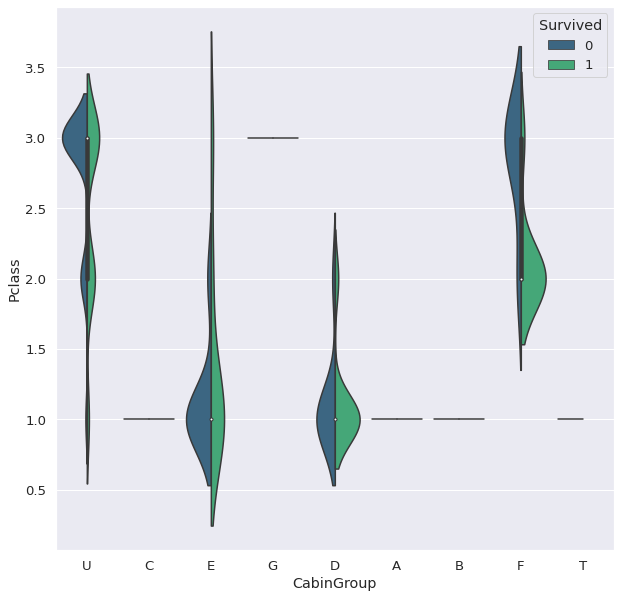

In [198]:
sns.violinplot(y="Pclass", x="CabinGroup", data=df_train, hue='Survived', split=True, palette='viridis')
#Pclass=2 & cabin = F many was survived other pclass=2 was very few and survived with small percentage 
#

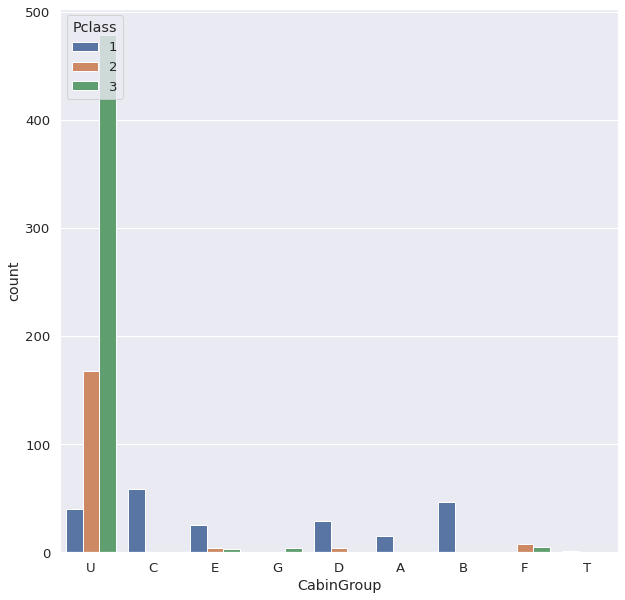

In [199]:
sns.countplot(hue='Pclass',x='CabinGroup' ,data=df_train)
#This emphasis & adds some information of the previous graph
#C,A,B had only pclass = 1 
#E,D,F were mixed of multiple classes . 
#we may have an observation that people of A,B,C should have survived more than other cabins people 

In [200]:
def bar_chart(feature):
    survived = df_train[df_train['Survived']==1][feature].value_counts()
    dead = df_train[df_train['Survived']==0][feature].value_counts()
    df_t = pd.DataFrame([survived,dead])
    df_t.index = ['Survived','Dead']
    df_t.plot(kind='bar',stacked=True, figsize=(10,5))

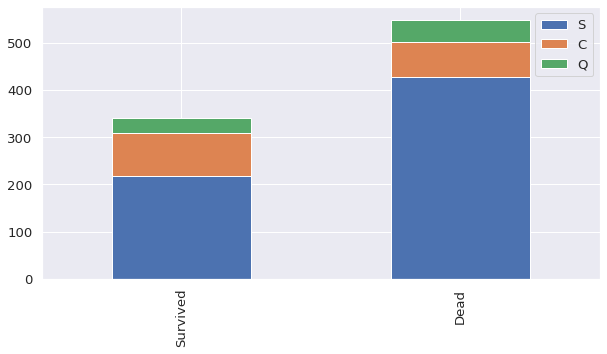

In [201]:
bar_chart('Embarked')

# Data preprocessing

In [202]:
#Feature engineering : 
#Create a column called Family , add sb&parch
df_train['Family'] = df_train['Parch']+df_train['SibSp']

#Change Survived into Y & N 
df_train['Survived'] = df_train['Survived'].replace([0,1],['N','Y'])


#Convert Sex into 0,1 
df_train['Sex'] = df_train['Sex'].replace(['male','female'],[0,1])



In [203]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Rank,CabinGroup,Family
0,1,N,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,U,1
1,2,Y,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,C,1
2,3,Y,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,U,0
3,4,Y,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,C,1
4,5,N,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,U,0


In [204]:
#remove unNeeded columns 

#Cabin => Replaced by cabinGroup or deck..
#Name =>Replaced by Rank
#Ticket => no need 
#Fare => No need (maybe further explored if i get low accuracy )
#SibSP =>Replaced by Family
#Parch => Replaced by Family 
#PassengerId => No need for now 
df_train.drop('Name',axis=1,inplace=True)
df_train.drop('Cabin',axis=1,inplace=True)
df_train.drop('Ticket',axis=1,inplace=True)
df_train.drop('Parch',axis=1,inplace=True)
df_train.drop('SibSp',axis=1,inplace=True)
df_train.drop('Fare',axis=1,inplace=True)
df_train.drop('PassengerId',axis=1,inplace=True)


In [205]:
#fill missing data with mean for age and mode for embraked 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') 
df_train['Age'] = imputer.fit_transform(df_train[['Age']])

imputer = SimpleImputer(strategy='most_frequent') 
df_train['Embarked'] = imputer.fit_transform(df_train[['Embarked']])



In [206]:
#imputing missing data values with median

In [207]:
#Imputing outliers with the mean/median ... 
subColumns = ['Age']

#Checking count of outlier manually, I will be updating them later on inshAllah but just to have a view.
for col in df_train[subColumns]:
    outliers_indices = ds.structdata.detect_outliers(df_train, 0, [col])
    print(f'in col: {col} , there is about {len(outliers_indices)} outliers.... imputing by median\n')
    col_median = df_train[col].median()
    df_train[col].iloc[outliers_indices] = col_median
    


in col: Age , there is about 66 outliers.... imputing by median



/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [208]:
df_train.isnull().sum() #no outliers 

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      0
Rank          0
CabinGroup    0
Family        0
dtype: int64

In [209]:
df_train.head()

,Survived,Pclass,Sex,Age,Embarked,Rank,CabinGroup,Family
0,N,3,0,22.0,S,0,U,1
1,Y,1,1,38.0,C,1,C,1
2,Y,3,1,26.0,S,2,U,0
3,Y,1,1,35.0,S,1,C,1
4,N,3,0,35.0,S,0,U,0


In [210]:
#Get dummies for CABINGROUP,EMBARKED
df_train = pd.get_dummies(df_train, columns=['Rank','CabinGroup','Pclass','Sex','Embarked'], drop_first=True)


In [244]:
df_train['Survived'] = df_train['Survived'].replace(['N','Y'],[0,1])


In [245]:
df_train.head()

,Survived,Age,Family,Rank_1,Rank_2,Rank_3,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_T,CabinGroup_U,Pclass_2,Pclass_3,Sex_1,Embarked_Q,Embarked_S
0,0,22.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,1,38.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,1,35.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,0,35.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


In [241]:
#Split data 


In [246]:
x=df_train.drop('Survived',axis=1) #get all features expect IFT
y = df_train['Survived']  # get only IFT 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=1) #splitting data into 80/20

In [214]:
#Scalling the data .... Let's try without 

# scaling the dataset

In [247]:
#scalling the data 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

sc =  StandardScaler()

sc.fit(x_train)

x_train = sc.transform(x_train)
x_test = sc.transform(x_test)



In [248]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [249]:
x_train.shape[1]
#Shape is 18 columns 

18

# Model creation & configuration

In [434]:
model = Sequential()
model.add(Dense(64, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
# I have tried many many configurations , I think this is the most resanable one without much overfitting .

In [435]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 64)                1216      
_________________________________________________________________
dropout_27 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 65        
Total params: 5,441
Trainable params: 5,441
Non-trainable params: 0
_________________________________________________________________


In [436]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [437]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=100)

# Model training

In [438]:
#Now training the model
#2000 epoch , batch size 64 
#validation 20% 
#
history = model.fit(x=x_train, y=y_train, epochs=2000, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)

Epoch 1/2000
4/4 [==============================] - 0s 33ms/step - loss: 0.7357 - accuracy: 0.4250 - val_loss: 0.6943 - val_accuracy: 0.4444
Epoch 2/2000
4/4 [==============================] - 0s 9ms/step - loss: 0.6798 - accuracy: 0.5833 - val_loss: 0.6329 - val_accuracy: 0.7037
Epoch 3/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.6237 - accuracy: 0.7375 - val_loss: 0.5886 - val_accuracy: 0.7037
Epoch 4/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.5935 - accuracy: 0.7167 - val_loss: 0.5504 - val_accuracy: 0.8148
Epoch 5/2000
4/4 [==============================] - 0s 9ms/step - loss: 0.5492 - accuracy: 0.7708 - val_loss: 0.5242 - val_accuracy: 0.7778
Epoch 6/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.5441 - accuracy: 0.8000 - val_loss: 0.5019 - val_accuracy: 0.7778
Epoch 7/2000
4/4 [==============================] - 0s 10ms/step - loss: 0.5131 - accuracy: 0.7917 - val_loss: 0.4864 - val_accuracy: 0.7407
Epoch 8/2000
4/

In [439]:
#predicting some the values , usually 1 means 1 and less than that is 0 
# y_pred = model.predict(x_test)
# y_pred

In [440]:
# y_pred = model.predict_classes(x_test)
# y_pred

In [441]:
#Evaluating the perfromance of the model ...we got 94% of accuracy 
model.evaluate(x_test, y_test)

20/20 [==============================] - 0s 1ms/step - loss: 0.5368 - accuracy: 0.7885


[0.5367667078971863, 0.7884615659713745]

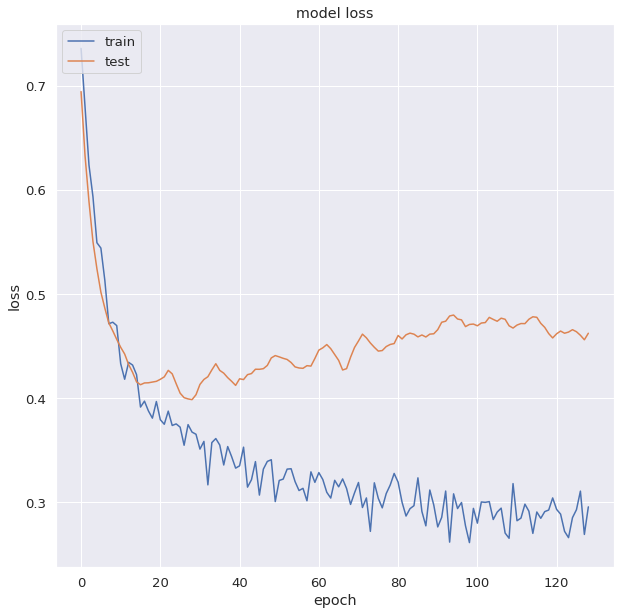

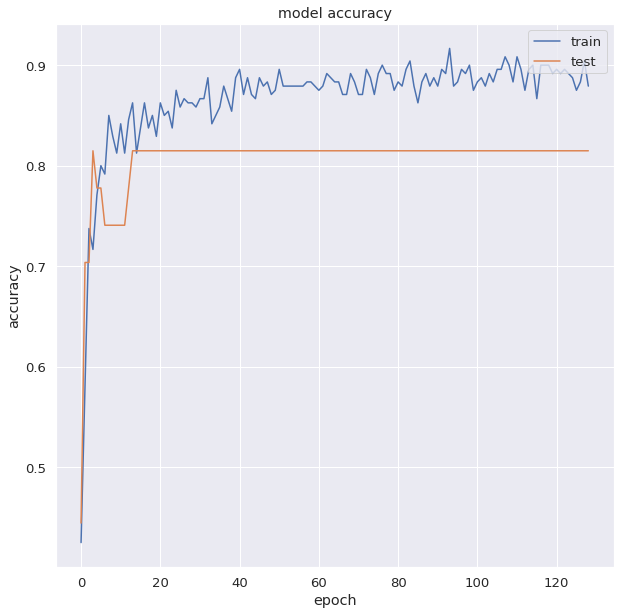

In [442]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [444]:
#Exporting model 
import joblib

In [445]:
joblib.dump(model,"model.pkl")

['model.pkl']

In [446]:
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']